# Workshop #5. Basics of `scanpy`

Firstly, let's install necessary Python packages.

In [ ]:
!pip install scanpy[leiden] scrublet
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
!unzip PBMC_10k.zip

## AnnData

In [2]:
import scanpy as sc
import seaborn as sns
import numpy as np

# `verbosity = 3` means show every log message
sc.settings.verbosity = 3

In [3]:
# Reading the dataset

adata = sc.read_10x_h5("filtered_feature_bc_matrix.h5")

reading filtered_feature_bc_matrix.h5
 (0:00:02)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
# Make gene names unique

adata.var_names_make_unique()

In [5]:
# Expression matrix

adata.X

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [6]:
# Sparse to dense matrix transformation

adata.X.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# Dense to sparse matrix transformation

from scipy.sparse import csr_matrix

X = np.array([[0, 1], [0, 0]])
X

array([[0, 1],
       [0, 0]])

In [8]:
X_sparse = csr_matrix(X)
X_sparse

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [9]:
# How to create AnnData manually

my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_adata = sc.AnnData(X=my_matrix)

my_adata

AnnData object with n_obs × n_vars = 3 × 3

In [10]:
# DataFrame with cells' annotation
adata.obs

""
AAACCCAAGGCCCAAA-1
AAACCCAAGTAATACG-1
AAACCCAAGTCACACT-1
AAACCCACAAAGCGTG-1
AAACCCACAATCGAAA-1
...
TTTGTTGGTTGGATCT-1
TTTGTTGGTTTCTTAC-1
TTTGTTGTCCATTTCA-1
TTTGTTGTCTACACAG-1


In [11]:
adata.obs["tissue"] = "PBMC"
adata.obs

,tissue
AAACCCAAGGCCCAAA-1,PBMC
AAACCCAAGTAATACG-1,PBMC
AAACCCAAGTCACACT-1,PBMC
AAACCCACAAAGCGTG-1,PBMC
AAACCCACAATCGAAA-1,PBMC
...,...
TTTGTTGGTTGGATCT-1,PBMC
TTTGTTGGTTTCTTAC-1,PBMC
TTTGTTGTCCATTTCA-1,PBMC
TTTGTTGTCTACACAG-1,PBMC


In [12]:
# Categorical Series

adata.obs["tissue"] = adata.obs.tissue.astype("category")
adata.obs.tissue

AAACCCAAGGCCCAAA-1    PBMC
AAACCCAAGTAATACG-1    PBMC
AAACCCAAGTCACACT-1    PBMC
AAACCCACAAAGCGTG-1    PBMC
AAACCCACAATCGAAA-1    PBMC
                      ... 
TTTGTTGGTTGGATCT-1    PBMC
TTTGTTGGTTTCTTAC-1    PBMC
TTTGTTGTCCATTTCA-1    PBMC
TTTGTTGTCTACACAG-1    PBMC
TTTGTTGTCTCATTAC-1    PBMC
Name: tissue, Length: 11996, dtype: category
Categories (1, object): ['PBMC']

In [13]:
# DataFrame with genes' annotation

del adata.var["genome"], adata.var["feature_types"]
adata.var["mt"] = adata.var.index.str.startswith("MT-")
adata.var

,gene_ids,mt
MIR1302-2HG,ENSG00000243485,False
FAM138A,ENSG00000237613,False
OR4F5,ENSG00000186092,False
AL627309.1,ENSG00000238009,False
AL627309.3,ENSG00000239945,False
...,...,...
AC141272.1,ENSG00000277836,False
AC023491.2,ENSG00000278633,False
AC007325.1,ENSG00000276017,False
AC007325.4,ENSG00000278817,False


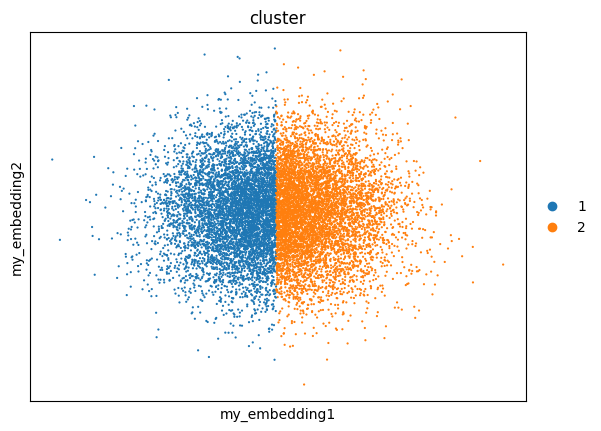

In [14]:
# Embeddings plotting

adata.obsm["my_embedding"] = np.random.normal(size=(11996, 2))
adata.obs["cluster"] = ["1" if i else "2" for i in (adata.obsm["my_embedding"][:, 0] < 0)]

sc.pl.embedding(adata, basis="my_embedding", color="cluster")

In [15]:
# Subselection in AnnData objects

adata[["TTTGTTGTCTCATTAC-1", "TTTGTTGGTTGGATCT-1"], ["CD4", "CD8A"]]

View of AnnData object with n_obs × n_vars = 2 × 2
    obs: 'tissue', 'cluster'
    var: 'gene_ids', 'mt'
    uns: 'cluster_colors'
    obsm: 'my_embedding'

In [16]:
# Layers in AnnData object

adata.layers["counts"] = adata.X.copy()
adata.layers["counts"]

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [17]:
# Saving AnnData object

adata.write_h5ad("adata.h5ad")

## Diagnostic plots for cells' QC

<Axes: ylabel='Count'>

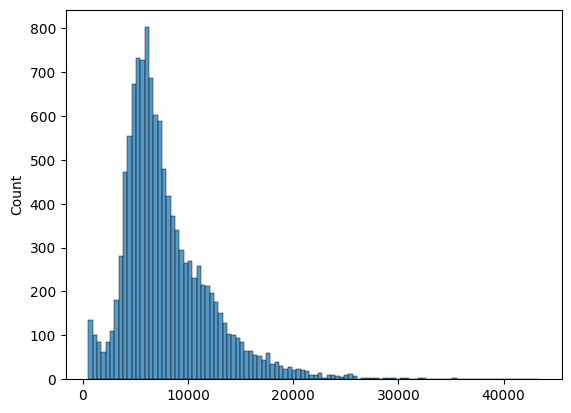

In [18]:
# UMI per cell distribution

counts_per_cell = adata.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)

<Axes: ylabel='Count'>

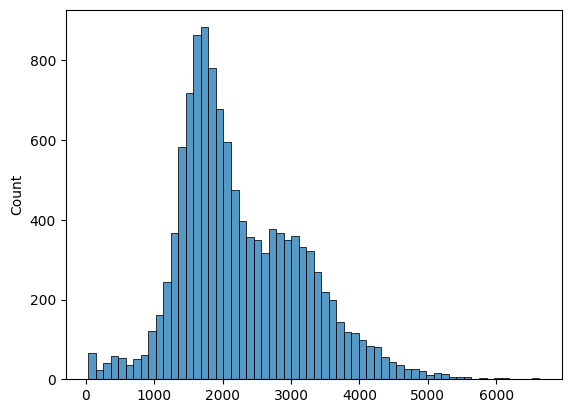

In [19]:
# Number of genes per cell distribution

genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell)

<Axes: ylabel='Count'>

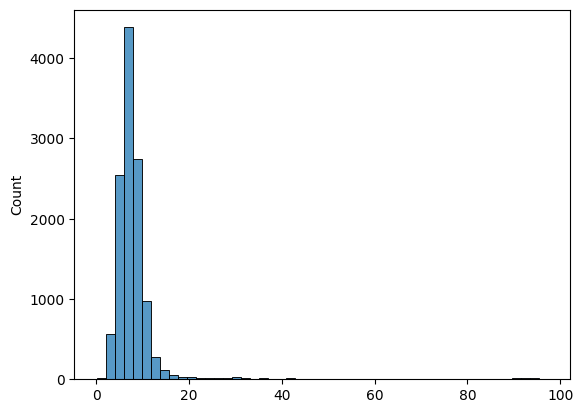

In [20]:
# % of mitochondrial expression per each cell distribution

mito_counts = adata[:, adata.var["mt"]].X.sum(axis=1).T.A[0]
mito_pct = mito_counts / counts_per_cell * 100
sns.histplot(mito_pct, bins=50)

# Hometask

## Task 1

Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described.

In [21]:
# https://genomebiology.biomedcentral.com/articles/10.1186/s13059-015-0844-5 - в Abstract
# https://www.science.org/doi/10.1126/science.1070919 - увидели бимодальное распределение в экспрессии бактериального гена и объяснили это флуктуациями этого гена (его активация и выключение)
# https://pubmed.ncbi.nlm.nih.gov/20185727/ - здесь уже для связывания ТФ с промотором
# https://www.nature.com/articles/nature12172 - было обнаружено бимодальное распределение для иммунных клеток (авторы это объясняют стохастикой и биологическими причинами)
# https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-1077-y - здесь это объясняется тем, что смешались два распределения (наблюдения с dropout и без него (т.е. клетки с наблюдаемой экспрессией генов))
# https://www.frontiersin.org/journals/genetics/articles/10.3389/fgene.2017.00062/full#B6
# https://academic.oup.com/bioinformatics/article/38/10/2791/6565315?login=false
# https://www.sciencedirect.com/science/article/pii/S2590177X18300015?via%3Dihub

## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in `loom` format and describe the features of such a format.

In [22]:
# https://datasets.cellxgene.cziscience.com/06ef682a-cbed-4ced-9a53-63611280ae37.h5ad
!gdown "https://datasets.cellxgene.cziscience.com/06ef682a-cbed-4ced-9a53-63611280ae37.h5ad"

Downloading...
From: https://datasets.cellxgene.cziscience.com/06ef682a-cbed-4ced-9a53-63611280ae37.h5ad
To: /content/06ef682a-cbed-4ced-9a53-63611280ae37.h5ad
100% 92.8M/92.8M [00:07<00:00, 12.8MB/s]


In [54]:
adata = sc.read_h5ad("project.h5ad")

In [55]:
# Make gene names unique

adata.var_names_make_unique()

In [25]:
# Sparse to dense matrix transformation

adata.X.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
# DataFrame with cells' annotation
adata.obs.tissue

AAACCCAAGAAGTCCG_HAM_MSK1216    tendon of semitendinosus
AAACCCAAGTTCATCG_HAM_MSK1216    tendon of semitendinosus
AAACGAACACATTCGA_HAM_MSK1216    tendon of semitendinosus
AAACGAACATGGAGAC_HAM_MSK1216    tendon of semitendinosus
AAACGAATCCTCATAT_HAM_MSK1216    tendon of semitendinosus
                                          ...           
TTTGACTAGTGGACTG_HAM_MSK0782    tendon of semitendinosus
TTTGGTTCAGTAGATA_HAM_MSK0782    tendon of semitendinosus
TTTGTTGAGTGCAGCA_HAM_MSK0782    tendon of semitendinosus
TTTGTTGCATGTACGT_HAM_MSK0782    tendon of semitendinosus
TTTGTTGGTCAAGCGA_HAM_MSK0782    tendon of semitendinosus
Name: tissue, Length: 10533, dtype: category
Categories (1, object): ['tendon of semitendinosus']

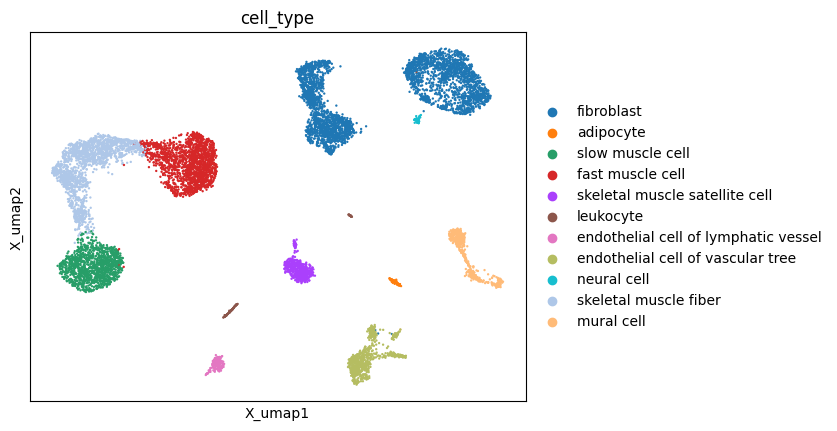

In [27]:
sc.pl.embedding(adata, basis="X_umap", color="cell_type")
# кластер с фибробластами разделился на два, что, наверное, не очень хорошо, хотя всё было измерено в одной ткани

<Axes: ylabel='Count'>

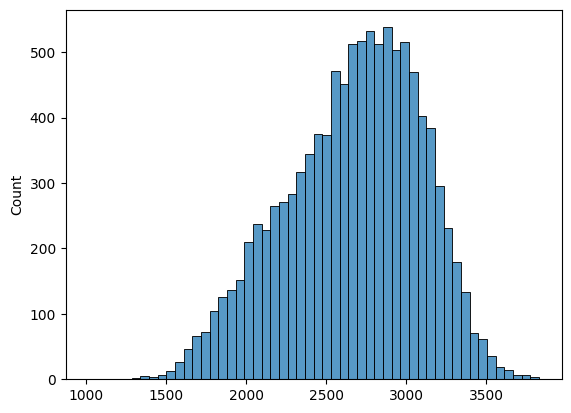

In [28]:
# UMI per cell distribution

counts_per_cell = adata.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)

<Axes: ylabel='Count'>

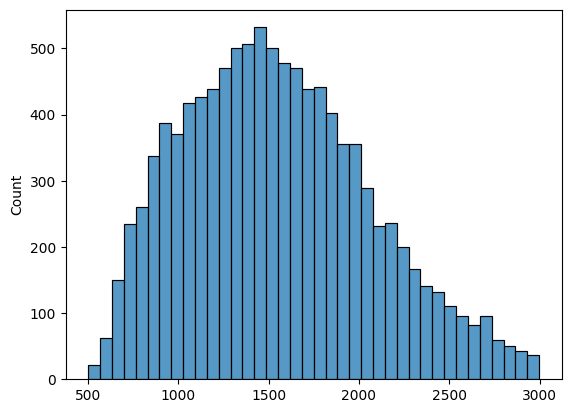

In [29]:
# Number of genes per cell distribution

genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell)

Судя по графикам выше, нет добавочных пиков.

In [30]:
# doublet detection

sc.external.pp.scrublet(adata, batch_key="sample_uuid")

Running Scrublet


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scrublet is deprecated; Import from sc.pp instead
  warnings.warn(msg, category=FutureWarning)


filtered out 15571 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.10
Detected doublet rate = 6.7%
Estimated detectable doublet fraction = 18.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 36.4%
filtered out 1694 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'disp

In [31]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))

In [33]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo"], inplace=True, log1p=True)

Нет экспрессии в митохондриальных или рибосомальных генах.

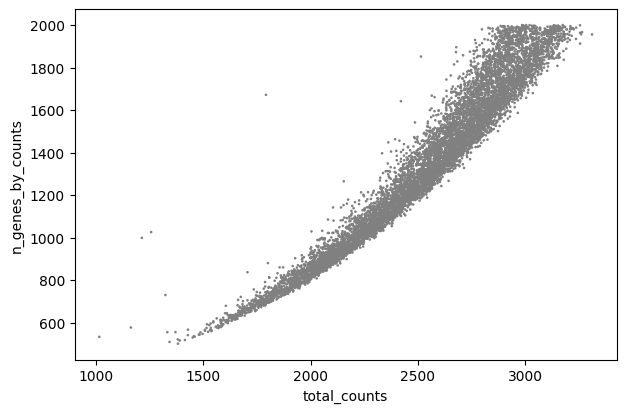

In [40]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts")

# видно, что у 1600 генов суммарно каунтов всего 3000, а дальше идёт разветвление на 2 ветви

In [41]:
sc.pp.filter_cells(adata, max_genes = 1600)

filtered out 2540 cells that have more than 1600 genes expressed


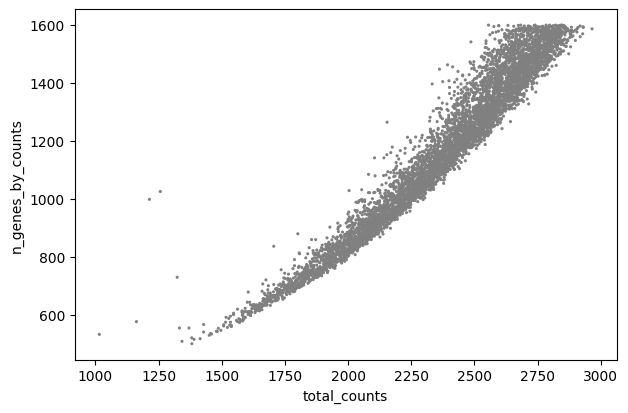

In [44]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts")

In [45]:
adata.obs['decontX_contamination'] # здесь авторы проводили коррекцию на контаминацию

AAACCCAAGAAGTCCG_HAM_MSK1216    0.033187
AAACCCAAGTTCATCG_HAM_MSK1216    0.025907
AAACGAACACATTCGA_HAM_MSK1216    0.041443
AAACGAATCCTCATAT_HAM_MSK1216    0.127541
AAAGAACTCGACGATT_HAM_MSK1216    0.034581
                                  ...   
TTTCGATGTATCCCTC_HAM_MSK0782    0.075924
TTTCGATTCACCTCTG_HAM_MSK0782    0.038771
TTTGACTAGTGGACTG_HAM_MSK0782    0.043331
TTTGGTTCAGTAGATA_HAM_MSK0782    0.009602
TTTGTTGCATGTACGT_HAM_MSK0782    0.038272
Name: decontX_contamination, Length: 5966, dtype: float64

Контроль качества прошёл хорошо, хотя наличие двух кластеров с фибробластами не очень хорошо.